# Transmissão COVID

Este projeto tem como foco identificar uma pessoa que está contaminada com COVID e outra pessoa que não está, verificando qual o caminho mais propício para a transmissão do vírus

Vamos importar as bibliotecas que vão nos ajudar a visualizar o grafo e também nos oferecer um conjunto de grafos já construído

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

Aqui importamos os dados das relações dos personagens de os Miseráveis, cujo grafo vamos utilizar para simular as relações entre as pessoas

In [2]:
g = nx.generators.social.les_miserables_graph()

Aqui vamos plotar o grafo para identificar as relações de uma forma mais abstrata

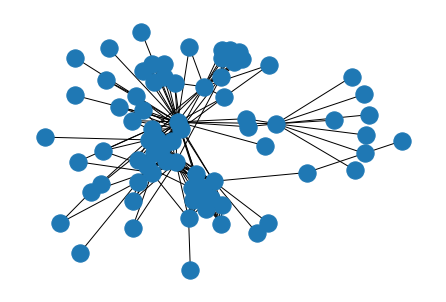

In [3]:
nx.draw(g)
plt.show()

O objeto grafo que temos está em uma classe Graph, do próprio NetworkX, porém para manipulá-lo e utilizar um estrutura de dados que não simplifique muito, vamos converte para um dicionário em Python, que vai servir para simular uma lista de adjacência.

In [4]:
G_dict = nx.convert.to_dict_of_dicts(g)

Aqui vamos ver qual o formato da estrutura de dados e como os dados estão distribuídos no grafo.

In [5]:
for k,v in G_dict.items():
    print(k,v)

Napoleon {'Myriel': {'weight': 1}}
Myriel {'Napoleon': {'weight': 1}, 'MlleBaptistine': {'weight': 8}, 'MmeMagloire': {'weight': 10}, 'CountessDeLo': {'weight': 1}, 'Geborand': {'weight': 1}, 'Champtercier': {'weight': 1}, 'Cravatte': {'weight': 1}, 'Count': {'weight': 2}, 'OldMan': {'weight': 1}, 'Valjean': {'weight': 5}}
MlleBaptistine {'Myriel': {'weight': 8}, 'MmeMagloire': {'weight': 6}, 'Valjean': {'weight': 3}}
MmeMagloire {'Myriel': {'weight': 10}, 'MlleBaptistine': {'weight': 6}, 'Valjean': {'weight': 3}}
CountessDeLo {'Myriel': {'weight': 1}}
Geborand {'Myriel': {'weight': 1}}
Champtercier {'Myriel': {'weight': 1}}
Cravatte {'Myriel': {'weight': 1}}
Count {'Myriel': {'weight': 2}}
OldMan {'Myriel': {'weight': 1}}
Valjean {'Labarre': {'weight': 1}, 'MmeMagloire': {'weight': 3}, 'MlleBaptistine': {'weight': 3}, 'Myriel': {'weight': 5}, 'Marguerite': {'weight': 1}, 'MmeDeR': {'weight': 1}, 'Isabeau': {'weight': 1}, 'Gervais': {'weight': 1}, 'Fantine': {'weight': 9}, 'MmeThenardi

A primeira coisa que temos que pensar é que o peso da relações é grande quando a relação é forte, porém se pensarmos no algoritmo de Djikstra, ele busca o caminho de menor peso, por isso é essencial que inverta-se os pesos das relações, por exemplo:

- Myriel -> MlleBaptistine: {'weight': 8}

Precisamos que este peso se inverta, porém vamos ver quais são os intervalos destes valores para assim poder fazer a inversão.

In [6]:
maior_peso = 0
menor_peso = 1

for fonte, conexoes in G_dict.items():
    for nome, weight in conexoes.items():
        if weight['weight'] > maior_peso:
            maior_peso = weight['weight']
        
print(maior_peso)

31


Identificamos o maior peso de todas as arestas para poder fazer a alteração já relatada anteriormente.

Não foi necessário utilizar um método para identificar o menor peso, visto que quando o peso é '0', não há relação, e por também não termos nenhum peso negativo. Logo, o menor peso será 1.

Antes de inverter, vamos verificar como estão os primeiros pesos para poder comparar após rodar o código e ver se tivemos sucesso.

In [7]:
for fonte, conexoes in G_dict.items():
    print(fonte, '-> Essa é a fonte.')
    for nome, weight in v.items():
        print(nome, weight['weight'])

Napoleon -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Myriel -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
MlleBaptistine -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
MmeMagloire -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
CountessDeLo -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Geborand -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Champtercier -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Cravatte -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
Count -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courfeyrac 1
Gavroche 1
Enjolras 1
OldMan -> Essa é a fonte.
Bossuet 1
Joly 1
Grantaire 1
Bahorel 1
Courf

Para o próximo passo, vamos fazer a inversão proporcional que se dará por uma subtração do peso máximo.

In [8]:
for fonte, conexoes in G_dict.items():
    for nome, peso in conexoes.items():
        peso['peso'] = maior_peso - peso['weight'] + 1

Após a inversão, precisamos verificar o sucesso do que fizemos. 

In [9]:
for fonte, conexoes in G_dict.items():
    print(fonte, '-> Essa é a fonte.')
    for nome, peso in v.items():
        print(nome, peso['peso'])

Napoleon -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Myriel -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
MlleBaptistine -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
MmeMagloire -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
CountessDeLo -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Geborand -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Champtercier -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Cravatte -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
Count -> Essa é a fonte.
Bossuet 31
Joly 31
Grantaire 31
Bahorel 31
Courfeyrac 31
Gavroche 31
Enjolras 31
OldMan 

Certo! Após a verificação, conseguimos confirmar que tivemos sucesso ao fazer a inversão dos pesos. 

Agora, o próximo passo é utilizar o algoritmo de Dijkstra feito por nós pra encontrar o menor caminho.